# Séance 2 — Visualisation rapide & exploration (Matplotlib / Plotly)

## 🎯 Objectifs
- Visualiser des distributions et des séries temporelles pour diagnostics
- Comprendre quand utiliser chaque type de graphique
- Apprendre à interpréter les visualisations
- Créer des graphiques interactifs avec Plotly Express

---

## 📚 Introduction

La visualisation de données est essentielle pour comprendre rapidement vos données, détecter des anomalies, et communiquer vos résultats. Dans cette séance, nous allons explorer les graphiques les plus courants et apprendre à les utiliser efficacement.

**Bibliothèques nécessaires :**
```python
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
```

**Installation :**
```bash
pip install pandas numpy plotly matplotlib
```

---

## 🔄 Dataset d'exemple

Pour cette séance, nous utiliserons un jeu de données simple sur les ventes. Créons-le directement :

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Créer un dataset de ventes
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

data = {
    'date': dates,
    'ventes': np.random.normal(1000, 200, len(dates)) + np.sin(np.arange(len(dates)) * 2 * np.pi / 365) * 300,
    'produit': np.random.choice(['A', 'B', 'C', 'D'], len(dates)),
    'region': np.random.choice(['Nord', 'Sud', 'Est', 'Ouest'], len(dates)),
    'prix': np.random.uniform(10, 100, len(dates))
}

df = pd.DataFrame(data)
df['ventes'] = df['ventes'].clip(lower=0)  # Pas de ventes négatives
print(df.head())
print(f"\nDimensions: {df.shape}")

        date       ventes produit region       prix
0 2023-01-01  1099.342831       B  Ouest  25.874829
1 2023-01-02   977.511147       A    Est  54.853100
2 2023-01-03  1139.864191       B    Sud  47.703290
3 2023-01-04  1320.091871       B    Sud  92.336131
4 2023-01-05   973.810053       D    Est  42.615451

Dimensions: (365, 5)


## 📊 1. Histogrammes
### 📌 À quoi ça sert ?
Les histogrammes montrent la **distribution d'une variable numérique**. Ils permettent de voir :
- La forme de la distribution (normale, asymétrique, etc.)
- Les valeurs les plus fréquentes
- La présence de valeurs extrêmes

### 🔍 Quand l'utiliser ?
- Pour comprendre la distribution d'une variable
- Pour détecter des anomalies ou valeurs aberrantes
- Pour vérifier si vos données suivent une distribution normale

### 💻 Exemple avec Plotly

In [5]:
import plotly.express as px

# Histogramme simple
fig = px.histogram(df, 
                   x='ventes', 
                   nbins=30,
                   title='Distribution des ventes',
                   labels={'ventes': 'Montant des ventes (€)'},
                   color_discrete_sequence=['#636EFA'])

fig.update_layout(
    xaxis_title='Ventes (€)',
    yaxis_title='Fréquence',
    showlegend=False
)

fig.show()

### 🎨 Histogramme par catégorie

In [6]:
# Histogramme avec plusieurs catégories
fig = px.histogram(df, 
                   x='ventes', 
                   color='produit',
                   nbins=25,
                   title='Distribution des ventes par produit',
                   barmode='overlay',  # 'overlay', 'group', ou 'stack'
                   opacity=0.7)

fig.show()


### 📖 Comment interpréter ?
- **Pic unique** : Distribution normale, données cohérentes
- **Plusieurs pics** : Présence de sous-groupes différents
- **Asymétrie** : Données biaisées (ex: revenus, souvent asymétriques à droite)
- **Valeurs isolées** : Outliers potentiels à investiguer

---

## 📦 2. Boxplots (Boîtes à moustaches)

### 📌 À quoi ça sert ?
Les boxplots montrent la **distribution et la dispersion** des données à travers 5 statistiques clés :
- Minimum
- Premier quartile (Q1, 25%)
- Médiane (Q2, 50%)
- Troisième quartile (Q3, 75%)
- Maximum

### 🔍 Quand l'utiliser ?
- Pour comparer des distributions entre groupes
- Pour identifier rapidement les outliers
- Pour voir la dispersion et la symétrie des données

### 💻 Exemple avec Plotly

In [7]:
# Boxplot simple
fig = px.box(df, 
             y='ventes',
             title='Distribution des ventes',
             points='outliers')  # 'outliers', 'all', False

fig.update_layout(yaxis_title='Ventes (€)')
fig.show()

### 🎨 Boxplot par catégorie

In [8]:
# Comparer plusieurs groupes
fig = px.box(df, 
             x='produit', 
             y='ventes',
             color='produit',
             title='Distribution des ventes par produit',
             points='outliers')

fig.update_layout(
    xaxis_title='Produit',
    yaxis_title='Ventes (€)'
)

fig.show()

### 🎨 Boxplot horizontal par région

In [9]:
# Boxplot horizontal
fig = px.box(df, 
             x='ventes', 
             y='region',
             color='region',
             title='Distribution des ventes par région',
             orientation='h')

fig.show()


### 📖 Comment interpréter ?

```
        Maximum ──────┐
                      │
        Q3 ────────┐  │
                   │  │
        Médiane ───┼──┤  ← La boîte représente 50% des données
                   │  │
        Q1 ────────┘  │
                      │
        Minimum ──────┘

        • Points isolés = Outliers
```

- **Boîte large** : Données très dispersées
- **Boîte étroite** : Données concentrées
- **Médiane au centre** : Distribution symétrique
- **Médiane décalée** : Distribution asymétrique
- **Points au-delà des moustaches** : Outliers (valeurs > Q3 + 1.5×IQR ou < Q1 - 1.5×IQR)

### 🎨 Exemples visuels de différents types de boxplots

Pour mieux comprendre l'interprétation, générons des données avec différentes caractéristiques :

In [10]:
# Générer différents types de distributions
np.random.seed(123)

# 1. Distribution étroite et symétrique (données concentrées)
donnees_etroites = np.random.normal(100, 5, 200)

# 2. Distribution large et symétrique (données dispersées)
donnees_larges = np.random.normal(100, 25, 200)

# 3. Distribution asymétrique à droite
donnees_asym_droite = np.random.exponential(20, 200) + 50

# 4. Distribution avec outliers
donnees_base = np.random.normal(100, 10, 194)
# Ajouter quelques valeurs extrêmes
donnees_outliers = np.append(donnees_base, [150, 155, 160, 45, 40, 35])

# Créer un dataframe pour visualiser (tous de même longueur maintenant)
df_exemples = pd.DataFrame({
    'Étroite\n(peu dispersée)': donnees_etroites,
    'Large\n(très dispersée)': donnees_larges,
    'Asymétrique\n(skewed)': donnees_asym_droite,
    'Avec outliers': donnees_outliers
})

# Combiner
df_exemples_long = df_exemples.melt(var_name='Type', value_name='Valeur')

# Créer le boxplot comparatif
fig = px.box(df_exemples_long, 
             x='Type', 
             y='Valeur',
             color='Type',
             title='Exemples de différents types de distributions',
             points='outliers')

fig.update_layout(
    showlegend=False,
    xaxis_title='Type de distribution',
    yaxis_title='Valeur'
)

fig.show()


**Ce que vous devriez observer :**
- **Étroite** : Boîte courte (faible IQR), données concentrées autour de la médiane
- **Large** : Boîte haute (grand IQR), données très dispersées
- **Asymétrique** : Médiane décentrée, moustache supérieure plus longue
- **Avec outliers** : Points isolés au-delà des moustaches

---

## 📈 3. Séries temporelles

### 📌 À quoi ça sert ?
Les graphiques de séries temporelles montrent l'**évolution d'une variable dans le temps**. Ils permettent de :
- Identifier des tendances
- Détecter la saisonnalité
- Repérer des anomalies temporelles

### 🔍 Quand l'utiliser ?
- Pour analyser l'évolution temporelle
- Pour prévoir des tendances futures
- Pour comparer plusieurs séries temporelles

### 💻 Exemple simple avec Plotly

In [11]:
# Série temporelle simple
fig = px.line(df, 
              x='date', 
              y='ventes',
              title='Évolution des ventes en 2023',
              labels={'date': 'Date', 'ventes': 'Ventes (€)'})

fig.update_layout(
    hovermode='x unified',
    xaxis_title='Date',
    yaxis_title='Ventes (€)'
)

fig.show()

### 🎨 Série temporelle avec moyenne mobile

In [12]:
# Ajouter une moyenne mobile pour voir la tendance
df_sorted = df.sort_values('date')
df_sorted['moyenne_mobile_7j'] = df_sorted['ventes'].rolling(window=7).mean()

# Créer un dataframe long pour plotly express
df_melted = df_sorted.melt(
    id_vars=['date'], 
    value_vars=['ventes', 'moyenne_mobile_7j'],
    var_name='type', 
    value_name='montant'
)

fig = px.line(df_melted, 
              x='date', 
              y='montant',
              color='type',
              title='Ventes avec tendance (moyenne mobile 7 jours)',
              labels={'date': 'Date', 'montant': 'Ventes (€)', 'type': 'Type'},
              color_discrete_map={'ventes': 'lightblue', 'moyenne_mobile_7j': 'red'})

# Rendre la ligne des ventes plus transparente et fine
fig.data[0].update(line=dict(width=1), opacity=0.5)
# Rendre la ligne de moyenne mobile plus épaisse
fig.data[1].update(line=dict(width=2))

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Ventes (€)',
    hovermode='x unified',
    legend_title_text='Légende'
)

fig.show()

### 🎨 Comparer plusieurs séries

In [13]:
# Ventes par produit dans le temps
df_produit = df.groupby(['date', 'produit'])['ventes'].sum().reset_index()

fig = px.line(df_produit, 
              x='date', 
              y='ventes',
              color='produit',
              title='Évolution des ventes par produit',
              labels={'date': 'Date', 'ventes': 'Ventes (€)'})

fig.update_layout(hovermode='x unified')
fig.show()


### 📖 Comment interpréter ?
- **Tendance croissante/décroissante** : Évolution générale
- **Pics réguliers** : Saisonnalité (ex: ventes élevées en fin de mois)
- **Pics isolés** : Événements ponctuels (promotions, anomalies)
- **Variabilité** : Stabilité ou volatilité des données

---

## 🎯 4. Introduction à Plotly Express interactif

### 📌 Pourquoi Plotly ?
Plotly offre des **graphiques interactifs** qui permettent :
- Zoom et pan
- Hover pour voir les détails
- Sélection de données
- Export d'images
- Facile à partager (HTML)

### 💻 Scatter plot interactif


In [21]:
# Nuage de points avec informations au survol
fig = px.scatter(df, 
                 x='prix', 
                 y='ventes',
                 color='produit',
                 size='ventes',
                 hover_data=['region', 'date'],
                 title='Relation entre prix et ventes',
                 labels={'prix': 'Prix (€)', 'ventes': 'Ventes (€)'})

fig.update_traces(marker=dict(opacity=0.6))
fig.show()

### 🎨 Graphique à barres interactif

In [15]:
# Ventes moyennes par région
ventes_region = df.groupby('region')['ventes'].agg(['mean', 'std']).reset_index()

fig = px.bar(ventes_region, 
             x='region', 
             y='mean',
             error_y='std',
             title='Ventes moyennes par région (avec écart-type)',
             labels={'mean': 'Ventes moyennes (€)', 'region': 'Région'},
             color='region')

fig.update_layout(showlegend=False)
fig.show()

### 🎨 Heatmap (carte de chaleur)

In [16]:
# Ventes par jour de la semaine et produit
df['jour_semaine'] = df['date'].dt.day_name()
df['jour_num'] = df['date'].dt.dayofweek  # 0=Lundi, 6=Dimanche

heatmap_data = df.groupby(['produit', 'jour_semaine', 'jour_num'])['ventes'].mean().reset_index()
heatmap_data = heatmap_data.sort_values('jour_num')
heatmap_pivot = heatmap_data.pivot(index='produit', columns='jour_semaine', values='ventes')

fig = px.imshow(heatmap_pivot,
                labels=dict(x="Jour de la semaine", y="Produit", color="Ventes moyennes"),
                title='Ventes moyennes par produit et jour de la semaine',
                color_continuous_scale='Viridis')

fig.show()

### 🎨 Facettes (Subplots) avec Plotly Express

In [17]:
# Créer des graphiques en facettes (côte à côte)
# Histogramme par produit
fig = px.histogram(df, 
                   x='ventes', 
                   facet_col='produit',
                   facet_col_wrap=2,
                   title='Distribution des ventes par produit',
                   nbins=20)

fig.update_layout(height=500)
fig.show()

# Séries temporelles multiples
df_produit = df.groupby(['date', 'produit'])['ventes'].sum().reset_index()
fig = px.line(df_produit,
              x='date',
              y='ventes',
              facet_col='produit',
              facet_col_wrap=2,
              title='Évolution des ventes par produit')

fig.update_layout(height=500)
fig.show()


## 📋 Résumé : Quel graphique choisir ?

| Type de graphique | Utilisation | Exemple |
|-------------------|-------------|---------|
| **Histogramme** | Distribution d'une variable numérique | Âges, revenus, scores |
| **Boxplot** | Comparer des distributions, détecter outliers | Salaires par département |
| **Série temporelle** | Évolution dans le temps | Ventes mensuelles, cours boursiers |
| **Scatter plot** | Relation entre 2 variables | Prix vs demande |
| **Bar chart** | Comparer des catégories | Ventes par région |
| **Heatmap** | Visualiser une matrice de valeurs | Corrélations, patterns temporels |

---

## 💡 Bonnes pratiques

1. **Toujours titrer vos graphiques** : Un titre clair explique ce que montre le graphique
2. **Labelliser les axes** : Avec les unités (€, %, kg, etc.)
3. **Choisir des couleurs appropriées** : Cohérentes et accessibles
4. **Ne pas surcharger** : Un graphique = un message principal
5. **Interactivité avec Plotly** : Permet d'explorer les données en profondeur
6. **Contextualiser** : Ajouter des lignes de référence, moyennes, etc.

---

## 🔧 Comparaison Matplotlib vs Plotly

### Matplotlib

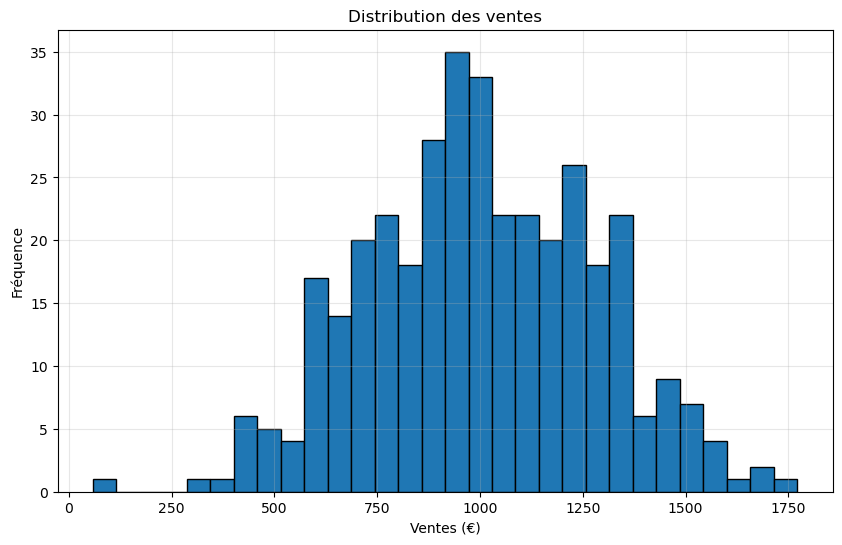

In [18]:
import matplotlib.pyplot as plt

# Exemple simple
plt.figure(figsize=(10, 6))
plt.hist(df['ventes'], bins=30, edgecolor='black')
plt.title('Distribution des ventes')
plt.xlabel('Ventes (€)')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)
plt.show()


**Avantages** : Rapide, grande communauté, personnalisation fine  
**Inconvénients** : Graphiques statiques, moins intuitif pour l'interactivité

### Plotly

In [19]:
import plotly.express as px

fig = px.histogram(df, x='ventes', nbins=30, title='Distribution des ventes')
fig.show()


**Avantages** : Interactif, moderne, facile à partager, bonne API  
**Inconvénients** : Fichiers HTML plus lourds, moins de contrôle fin

**Recommandation** : Utilisez **Plotly** pour l'exploration et les présentations, **Matplotlib** pour les publications scientifiques.

---

## 🎓 Exercices pratiques

### Exercice 1 : Histogrammes
Créez un histogramme des prix et identifiez :
- La fourchette de prix la plus fréquente
- S'il y a des outliers

### Exercice 2 : Boxplots
Comparez les distributions de ventes entre régions avec un boxplot. Quelle région a :
- Les ventes les plus élevées en médiane ?
- La plus grande dispersion ?
- Le plus d'outliers ?

### Exercice 3 : Séries temporelles
Créez un graphique montrant l'évolution des ventes avec une moyenne mobile de 30 jours. Identifiez :
- La tendance générale (croissance/décroissance)
- Les périodes de forte/faible activité

### Exercice 4 : Dashboard
Créez un dashboard avec 4 graphiques montrant :
1. Distribution des ventes
2. Ventes par produit (boxplot)
3. Évolution temporelle
4. Corrélation prix-ventes

---

## 📚 Ressources complémentaires

- [Documentation Plotly](https://plotly.com/python/)
- [Galerie d'exemples Plotly](https://plotly.com/python/plotly-express/)
- [Documentation Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/) : Alternative élégante basée sur Matplotlib

---

## 🎯 Points clés à retenir

✅ **Histogrammes** : Pour les distributions  
✅ **Boxplots** : Pour comparer et détecter les outliers  
✅ **Séries temporelles** : Pour l'évolution dans le temps  
✅ **Plotly** : Pour l'interactivité et l'exploration  
✅ **Un graphique = Un message** : Restez simple et clair  
✅ **Contexte** : Toujours titrer et labelliser

